<a href="https://colab.research.google.com/github/bhanu-50/CUSTOMER-PROFILING-OF-AEROFIT-TRADE-MILL/blob/main/Customer-Profiling-for-AeroFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

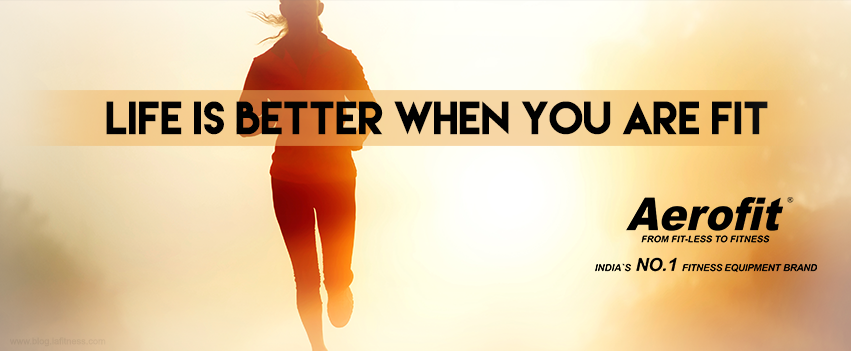

## About Aerofit 🏋

**Aerofit**, a dynamic player in the fitness industry, traces its origins to M/s. Sachdev Sports Co, established in **1928** by **Ram Ratan Sachdev**. From its modest beginnings in **Hyderabad**, India, the company evolved into a leading sports equipment supplier across Andhra Pradesh and Telangana. Recognizing the growing need for fitness solutions, M/s. Sachdev Overseas emerged to import quality fitness equipment under the "Aerofit" brand, ensuring affordability and post-sales excellence.

Driven by a dedication to innovation, **Nityasach Fitness Pvt Ltd** was founded, spearheaded by director **Nityesh Sachdev**. With the brand "Aerofit" at its core, the company aimed to bridge the gap between international fitness technology and the Indian market. By importing advanced fitness equipment at accessible price points, Aerofit sought to redefine the industry landscape, prioritizing health and vitality while staying true to its legacy of passion and customer focus.

Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## 🎯 Objective

Create comprehensive customer profiles for each AeroFit treadmill product through descriptive analytics. Develop two-way contingency tables and analyze conditional and marginal probabilities to discern customer characteristics, facilitating improved product recommendations and informed business decisions.

## 📚 About Data

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during three months.The data is available in a single csv file.

**Product Portfolio**
* The KP281 is an entry-level treadmill that sells for USD 1,500.

* The KP481 is for mid-level runners that sell for USD 1,750.

* The KP781 treadmill is having advanced features that sell for USD 2,500


## 📃 Features of the dataset:


| Feature | Description |
|:--------|:------------|
| Product | Product Purchased:	KP281, KP481, or KP781 |
| Age | Age of buyer in years |
| Gender | Gender of buyer (Male/Female) |
| Education | Education of buyer in years |
| MaritalStatus | MaritalStatus of buyer (Single or partnered) |
| Usage | The average number of times the buyer plans to use the treadmill each week |
| Income | Annual income of the buyer (in $) |
| Fitness | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape |
| Miles | The average number of miles the buyer expects to walk/run each week |

Dataset: [Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)

In [ ]:
#Download Dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 16.1MB/s]


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [ ]:
# loading the dataset
df =  pd.read_csv('/content/aerofit_treadmill.csv?1639992749')

In [ ]:
#First 5rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
#Last 5rows
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# 🔍 Insights

* From the above analysis, it is clear that, data has total of 9 features with mixed alpha numeric data. Also we can see that there is no missing data in the columns.

* The data type of all the columns are matching with the data present in them. But we will change the datatype of Usage and Fitness into str(object).

# 📝 Statistical Summary

In [ ]:
# statisctical summary of object type columns
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


🔍 Insights
1. **Product** - The `KP281` product demonstrated the highest sales performance among the three products, accounting for approximately `44%` of total sales.

2. **Gender** - Based on the data around `58%` of the buyers were `Male` and `42%` were `female`.

3. **Marital Status** - Based on the data around `60%` of the buyers were `Married` and `40%` were `single`.

In [ ]:
# statisctical summary of numerical data type columns

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# 🔍 Insights

**1. Age** - The age range of customers spans from `18 to 50 year`, with an average age of `29 years`.

**2. Education** - Customer education levels vary between `12 and 21 years`, with an average education duration of `16 years`.

**3. Usage** - Customers intend to utilize the product anywhere from `2 to 7 times per week`, with an average usage frequency of `3 times per week`.

**4. Fitness** - On average, customers have rated their fitness at `3` on a 5-point scale, reflecting a `moderate level of fitness`.

**5. Income** - The annual income of customers falls within the range of `USD 30,000 to USD 100,000`, with an average income of approximately `USD 54,000`.

**6. Miles** - Customers' weekly running goals range from `21 to 360 miles`, with an average target of `103 miles per week`.

In [ ]:
# Check for missing values
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0



- No values are missing from the features.

## Duplicate Detection

In [ ]:
df.duplicated().value_counts()

,count
False,180


### 🔍 Insights
- There are no duplicate entries in the dataset

# ✅ Sanity Check for columns




In [ ]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in Product column are :-
['KP281' 'KP481' 'KP781']
----------------------------------------------------------------------
Unique Values in Age column are :-
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Male' 'Female']
----------------------------------------------------------------------
Unique Values in Education column are :-
[14 15 12 13 16 18 20 21]
----------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Single' 'Partnered']
----------------------------------------------------------------------
Unique Values in Usage column are :-
[3 2 4 5 6 7]
----------------------------------------------------------------------
Unique Values in Fitness column are :-
[4 3 2 1 5]
----------------------------------------------------------------------
Unique Valu

### 🔍 Insights
- There are no duplicate entries in the dataset

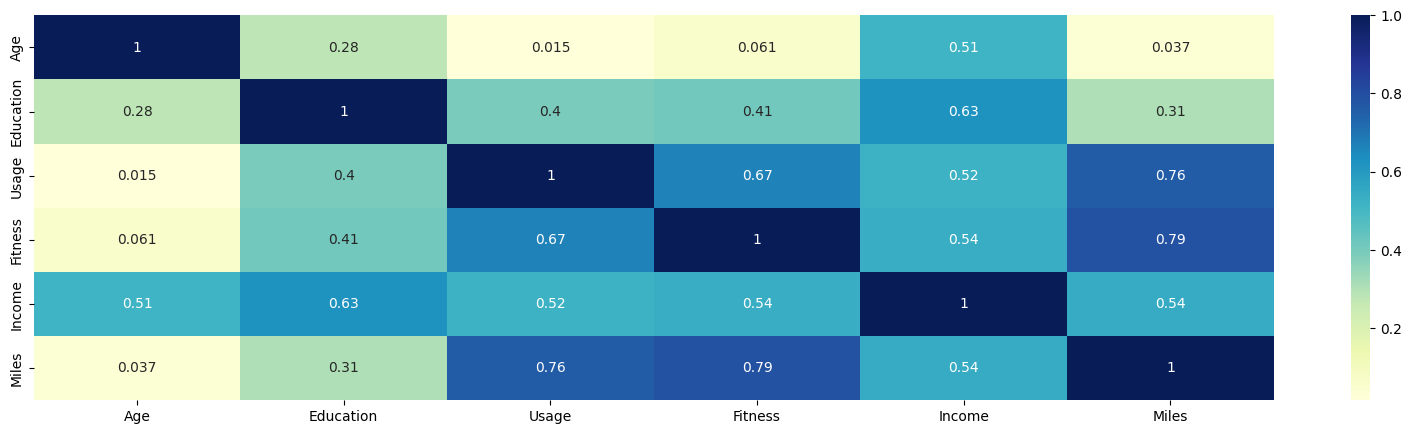

In [ ]:
sns.heatmap(df[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True, cmap='YlGnBu')
plt.show()

### 🔍 Insights
Here Pearson co-efficient is used to evalute the correlation between numerical data points. Pearson evalutes the linear relationship between data points.

Noting down the observations which are higher than 0.5.

*  Correlation between Age & Income is 0.51
*  Correlation between Education & Income is 0.63.
* Correlation between Usage & Fitness is 0.67.
* Correlation between Usage & Income is 0.52.
* Correlation between Usage & Miles is 0.76.
* Correlation between Fitness & Income is 0.54.
* Correlation between Fitness & Miles is 0.79.
* Correlation between Income & Miles is 0.54.




## ➕ Adding new columns for better analysis

- Creating New Column and Categorizing values in `Age,Education,Income and Miles` to different classes for better visualization

#### Age Column

- Categorizing the values in age column in 4 different buckets:

1. Young Adult: from 18 - 25
2. Adults: from 26 - 35
3. Middle Aged Adults: 36-45
4. Elder :46 and above

#### Education Column

- Categorizing the values in education column in 3 different buckets:

1. Primary Education: upto 12
2. Secondary Education: 13 to 15
3. Higher Education: 16 and above

#### Income Column

- Categorizing the values in Income column in 4 different buckets:

1. Low Income - Upto 40,000
2. Moderate Income - 40,000 to 60,000
3. High Income - 60,000 to 80,000
4. Very High Income - Above 80,000

#### Miles column

- Categorizing the values in miles column in 4 different buckets:

1. Light Activity - Upto 50 miles
2. Moderate Activity - 51 to 100 miles
3. Active Lifestyle - 101 to 200 miles
4. Fitness Enthusiast - Above 200 miles

In [ ]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = bin_range1,labels = bin_labels1)

#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

df['edu_group'] = pd.cut(df['Education'],bins = bin_range2,labels = bin_labels2)

#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = bin_range3,labels = bin_labels3)

#binning the miles values into  categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = bin_range4,labels = bin_labels4)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


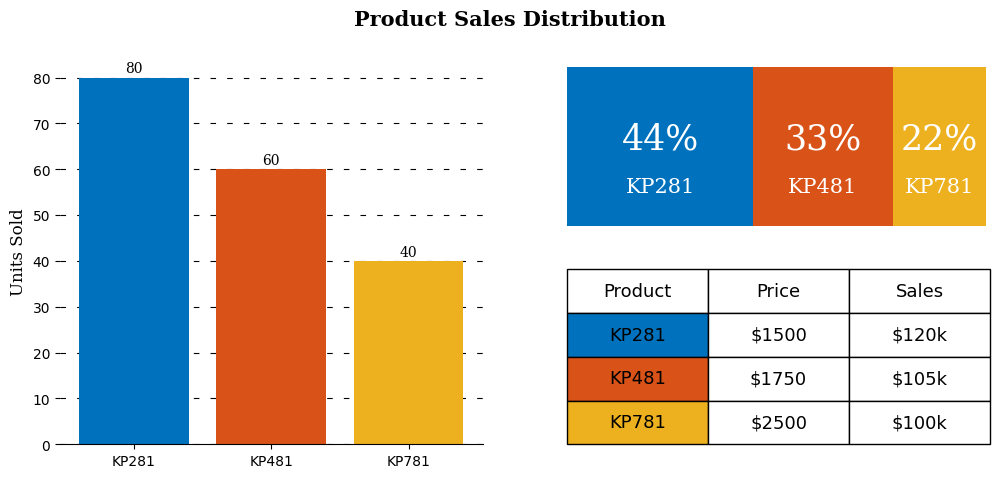

In [ ]:
#setting the plot style

fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(2,2)

                                            #creating plot for product column

ax0 = fig.add_subplot(gs[:,0])

product_count = df['Product'].value_counts()

color_map = ["#0072BD", "#D95319",	"#EDB120"]

ax0.bar(product_count.index,product_count.values,color = color_map,zorder = 2)

#adding the value_counts
for i in product_count.index:
    ax0.text(i,product_count[i]+2,product_count[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#adding axis label
ax0.set_ylabel('Units Sold',fontfamily='serif',fontsize = 12)

                                            #creating a plot for product % sale

ax1 = fig.add_subplot(gs[0,1])

product_count['percent'] = ((product_count.values/df.shape[0])* 100).round()

ax1.barh(product_count.index[0],product_count.loc['percent'][0],color = "#0072BD")
ax1.barh(product_count.index[0],product_count.loc['percent'][1],left = product_count.loc['percent'][0],color = '#D95319')
ax1.barh(product_count.index[0],product_count.loc['percent'][2],
         left = product_count.loc['percent'][0] + product_count.loc['percent'][1], color = '#EDB120')
ax1.set(xlim=(0,100))


# adding info to the each bar
product_count['info_percent'] =[product_count['percent'][0]/2,product_count['percent'][0] + product_count['percent'][1]/2,
                                 product_count['percent'][0] + product_count['percent'][1] + product_count['percent'][2]/2]
for i in range(3):
    ax1.text(product_count['info_percent'][i],0.04,f"{product_count['percent'][i]:.0f}%",
             va = 'center', ha='center',fontsize=25, fontweight='light', fontfamily='serif',color='white')

    ax1.text(product_count['info_percent'][i],-0.2,product_count.index[i],
             va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',color='white')

#removing the axis lines
ax1.axis('off')

                                        #creating a plot for product portfolio

ax2 = fig.add_subplot(gs[1,1])

product_portfolio = [['KP281','$1500','$120k'],['KP481','$1750','$105k'],['KP781','$2500','$100k']]
color_2d = [['#0072BD','#FFFFFF','#FFFFFF'],['#D95319','#FFFFFF','#FFFFFF'],['#EDB120','#FFFFFF','#FFFFFF']]

table = ax2.table(cellText = product_portfolio, cellColours=color_2d, cellLoc='center',colLabels =['Product','Price','Sales'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax2.axis('off')

#adding title to the visual
fig.suptitle('Product Sales Distribution',fontproperties = {'family':'serif', 'size':15,'weight':'bold'})

plt.show()

# 🔍 Insights
- The KP281 treadmill model, positioned as an entry-level product, has the highest number of units sold, trailed by the KP481 (mid-level) and KP781 (advanced) models.
- All three models have nearly equal contributions in terms of generating sales revenue.

### 🙎🏻‍♀️🙎🏻‍♂️ Gender and 👩🏻‍🤝‍🧑🏻Marital Status Disribution

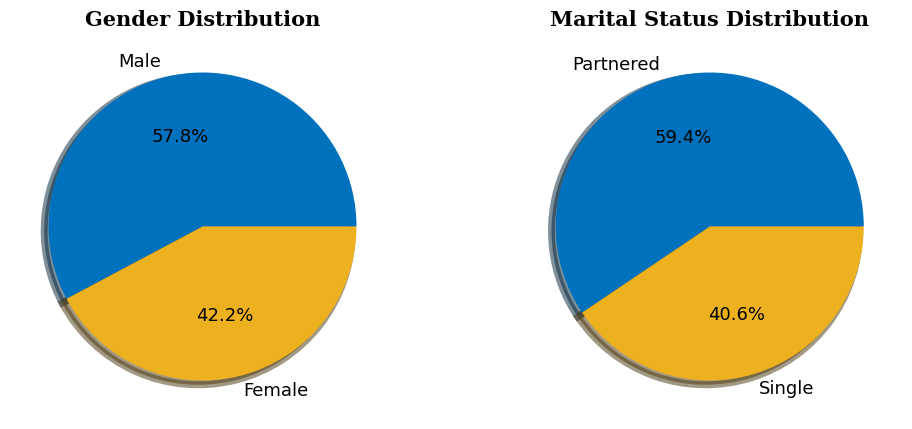

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(1,2)

                                        # creating pie chart for gender disribution
ax0 = fig.add_subplot(gs[0,0])
# '#D95319'
color_map = ['#0072BD', '#EDB120']
ax0.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax0.set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])

color_map = ['#0072BD', '#EDB120']
ax1.pie(df['MaritalStatus'].value_counts().values,labels = df['MaritalStatus'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### Buyer 🏋🏻‍♀️ Fitness and 🏃🏻‍♂️Treadmill Usage

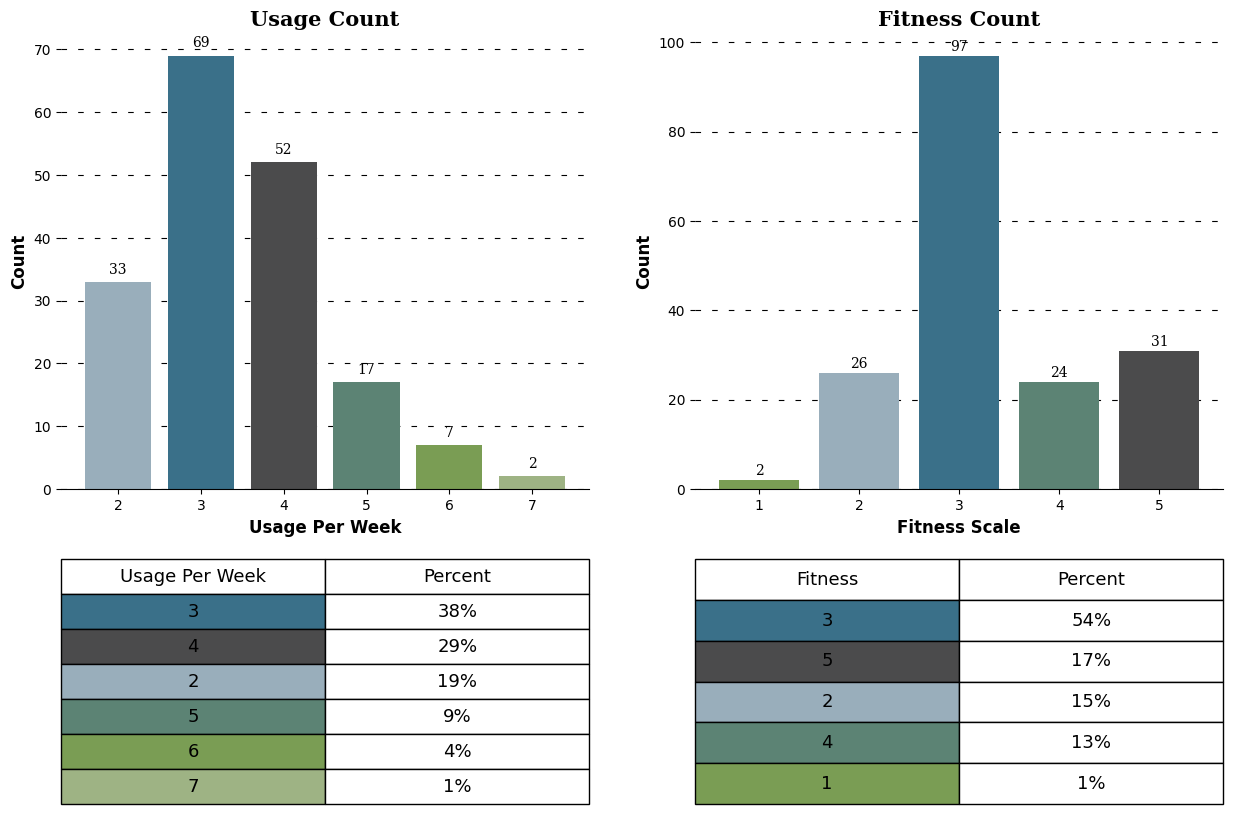

In [ ]:
#setting the plot style
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35])

                                        # creating bar chart for usage disribution

ax0 = fig.add_subplot(gs[0,0])
temp = df['Usage'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#7A9D54','#9EB384']
ax0.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax0.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax0.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#adding axis label
ax0.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax0.set_xlabel('Usage Per Week',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax0.set_title('Usage Count',{'font':'serif', 'size':15,'weight':'bold'})

                                        #creating a info table for usage

ax1 = fig.add_subplot(gs[1,0])
usage_info = [['3','38%'],['4','29%'],['2','19%'],['5','9%'],['6','4%'],['7','1%']]
color_2d = [["#3A7089",'#FFFFFF'],["#4b4b4c",'#FFFFFF'],['#99AEBB','#FFFFFF'],['#5C8374','#FFFFFF'],['#7A9D54','#FFFFFF'],
           ['#9EB384','#FFFFFF']]

table = ax1.table(cellText = usage_info, cellColours=color_2d, cellLoc='center',colLabels =['Usage Per Week','Percent'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax1.axis('off')

                                        # creating bar chart for fitness scale

ax2 = fig.add_subplot(gs[0,1])
temp = df['Fitness'].value_counts()
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#7A9D54','#9EB384']
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
ax2.set_xlabel('Fitness Scale',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax2.set_title('Fitness Count',{'font':'serif', 'size':15,'weight':'bold'})

                                        #creating a info table for usage

ax1 = fig.add_subplot(gs[1,1])
fitness_info = [['3','54%'],['5','17%'],['2','15%'],['4','13%'],['1','1%']]
color_2d = [["#3A7089",'#FFFFFF'],["#4b4b4c",'#FFFFFF'],['#99AEBB','#FFFFFF'],['#5C8374','#FFFFFF'],['#7A9D54','#FFFFFF']]

table = ax1.table(cellText = fitness_info, cellColours=color_2d, cellLoc='center',colLabels =['Fitness','Percent'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax1.axis('off')


plt.show()

### 🔍 Insights
- Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week

- 54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

### 📆 Customer Age Distribution

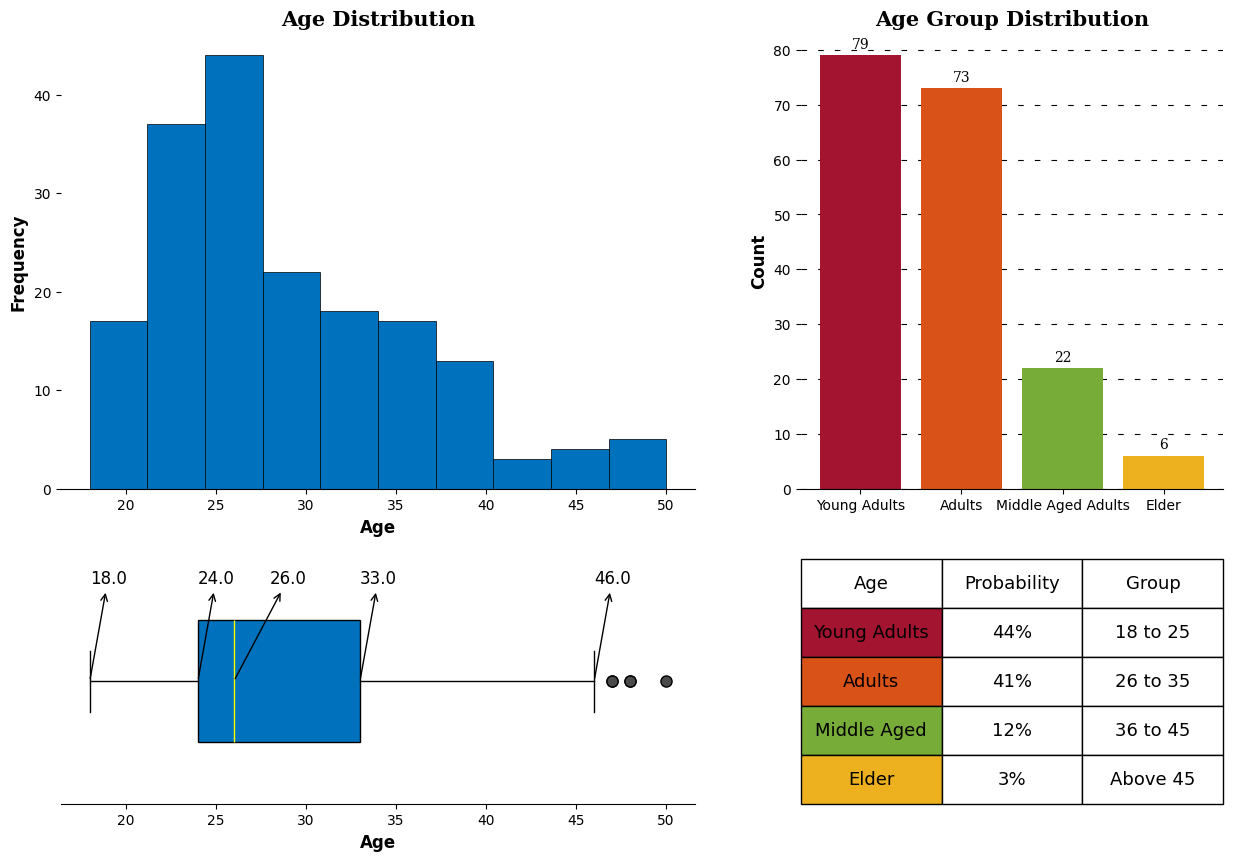

In [ ]:
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

                                    #creating age histogram

ax0 = fig.add_subplot(gs[0,0])

ax0.hist(df['Age'],color= '#0072BD',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Age',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Age Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for age

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Age'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor='#0072BD')

# Customize median line
boxplot['medians'][0].set(color='yellow')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = df['Age'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median + 2,1.4),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Age',fontweight = 'bold',fontsize = 12)

                                    #creating age group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = df['age_group'].value_counts()
color_map = ["#A2142F", "#D95319","#77AC39","#EDB120"]
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax2.set_title('Age Group Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        #creating a table for group info

ax3 = fig.add_subplot(gs[1,1])
age_info = [['Young Adults','44%','18 to 25'],['Adults','41%','26 to 35'],['Middle Aged','12%','36 to 45'],
            ['Elder','3%','Above 45']]
color_2d = [["#A2142F",'#FFFFFF','#FFFFFF'],["#D95319",'#FFFFFF','#FFFFFF'],['#77AC39','#FFFFFF','#FFFFFF'],
            ['#EDB120','#FFFFFF','#FFFFFF']]

table = ax3.table(cellText = age_info, cellColours=color_2d, cellLoc='center',colLabels =['Age','Probability','Group'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax3.axis('off')


plt.show()

### 🔍 Insights
- 85% of the customers fall in the age range of 18 to 35. with a median age of 26, suggesting young people showing more interest in the companies products

- Outliers

  - As we can see from the box plot, there are 3 outlier's present in the age data.

### 👨🏻‍🎓👩🏻‍🎓 Customer Education Distribution

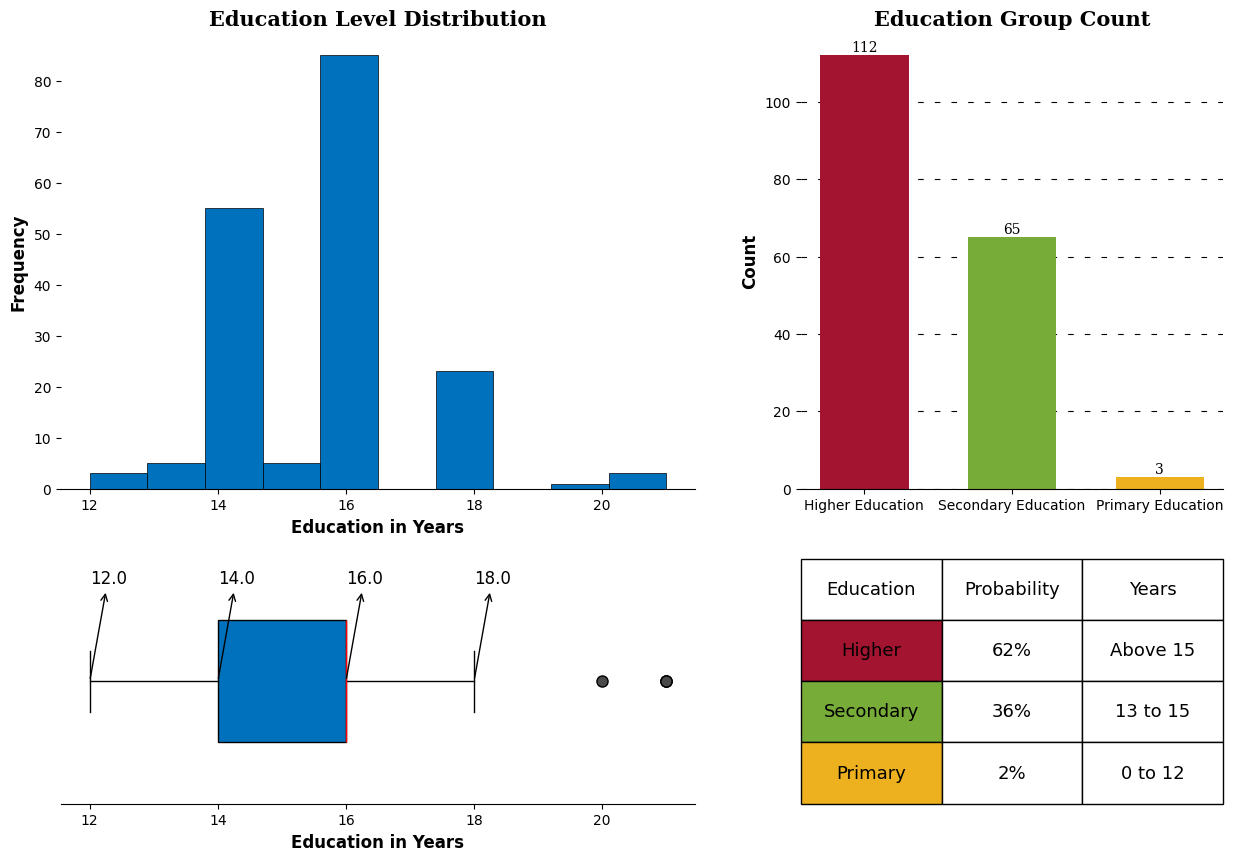

In [ ]:
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

                                    #creating education histogram

ax0 = fig.add_subplot(gs[0,0])

ax0.hist(df['Education'],color= '#0072BD',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Education in Years',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Education Level Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for education

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Education'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor='#0072BD')

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = df['Education'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))


#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Education in Years',fontweight = 'bold',fontsize = 12)

                                    #creating education group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = df['edu_group'].value_counts()
color_map = ["#A2142F","#77AC39","#EDB120"]
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2,width = 0.6)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax2.set_title('Education Group Count',{'font':'serif', 'size':15,'weight':'bold'})


                                        #creating a table for group info

ax3 = fig.add_subplot(gs[1,1])
edu_info = [['Higher','62%','Above 15'],['Secondary','36%','13 to 15'],['Primary','2%','0 to 12']]
color_2d = [["#A2142F",'#FFFFFF','#FFFFFF'],["#77AC39",'#FFFFFF','#FFFFFF'],['#EDB120','#FFFFFF','#FFFFFF']]

table = ax3.table(cellText = edu_info, cellColours=color_2d, cellLoc='center',colLabels =['Education','Probability','Years'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax3.axis('off')


plt.show()

### 🔍 Insights
- 98% of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.
- Outliers

  - As we can see from the box plot, there are 2 outlier's present in the education data.

### 💲 Customer Income Distribution

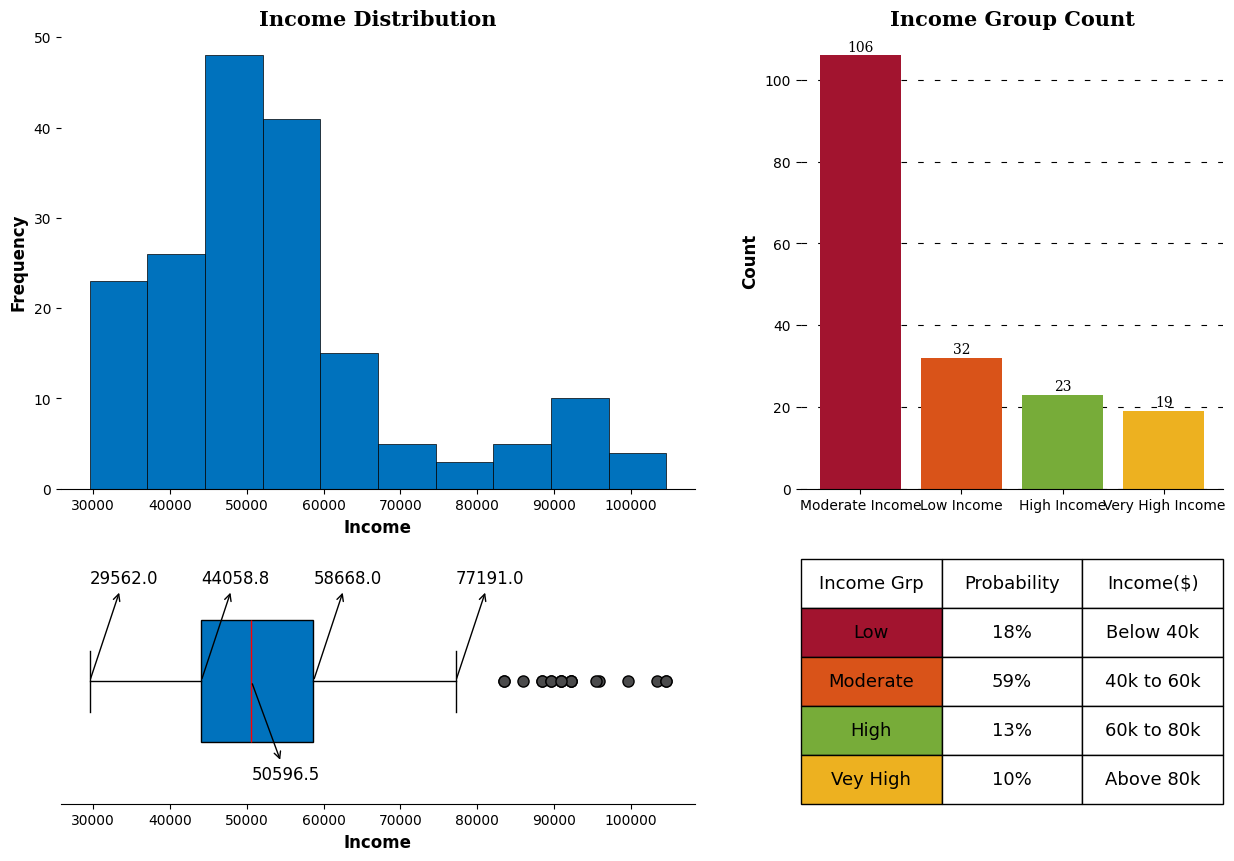

In [ ]:
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2,height_ratios=[0.65, 0.35],width_ratios = [0.6,0.4])

                                    #creating Income histogram

ax0 = fig.add_subplot(gs[0,0])

ax0.hist(df['Income'],color= '#0072BD',linewidth=0.5,edgecolor='black')
ax0.set_xlabel('Income',fontsize = 12,fontweight = 'bold')
ax0.set_ylabel('Frequency',fontsize = 12,fontweight = 'bold')

#removing the axis lines
for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)

#setting title for visual
ax0.set_title('Income Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                     #creating box plot for Income

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Income'],vert = False,patch_artist = True,widths = 0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor='#0072BD')

# Customize median line
boxplot['medians'][0].set(color='red')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor= "#4b4b4c")

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']] #getting the upperlimit,Q1,Q3 and lowerlimit

median = df['Income'].quantile(0.5) #getting Q2

for i,j in info: #using i,j here because of the output type of info list comprehension

    ax1.annotate(text = f"{i:.1f}", xy = (i,1), xytext = (i,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax1.annotate(text = f"{j:.1f}", xy = (j,1), xytext = (j,1.4),fontsize = 12,
                 arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#adding the median separately because it was included in info list
ax1.annotate(text = f"{median:.1f}",xy = (median,1),xytext = (median,0.6),fontsize = 12,
            arrowprops= dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

#removing y-axis ticks
ax1.set_yticks([])

#adding axis label
ax1.set_xlabel('Income',fontweight = 'bold',fontsize = 12)

                                    #creating Income group bar chart

ax2 = fig.add_subplot(gs[0,1])
temp = df['income_group'].value_counts()
color_map = ["#A2142F", "#D95319","#77AC39","#EDB120"]
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax2.set_title('Income Group Count',{'font':'serif', 'size':15,'weight':'bold'})

                                        #creating a table group info

ax3 = fig.add_subplot(gs[1,1])
inc_info = [['Low','18%','Below 40k'],['Moderate','59%','40k to 60k'],['High','13%','60k to 80k'],
            ['Vey High','10%','Above 80k']]
color_2d = [["#A2142F",'#FFFFFF','#FFFFFF'],["#D95319",'#FFFFFF','#FFFFFF'],['#77AC39','#FFFFFF','#FFFFFF'],
            ['#EDB120','#FFFFFF','#FFFFFF']]
table = ax3.table(cellText = inc_info, cellColours=color_2d, cellLoc='center',
                  colLabels =['Income Grp','Probability','Income($)'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax3.axis('off')
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

plt.show()

### 🔍 Insights

- Almost `60%` of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.


- Surprisingly `18%` of the customers fall in the income group of (<40) suggesting almost `77%` of the total customers fall in income group of below 60k and only `23%` of them falling in 60k and above income group


- **Outliers**
    
     - As we can see from the box plot, there are `many outlier's` present in the income data.

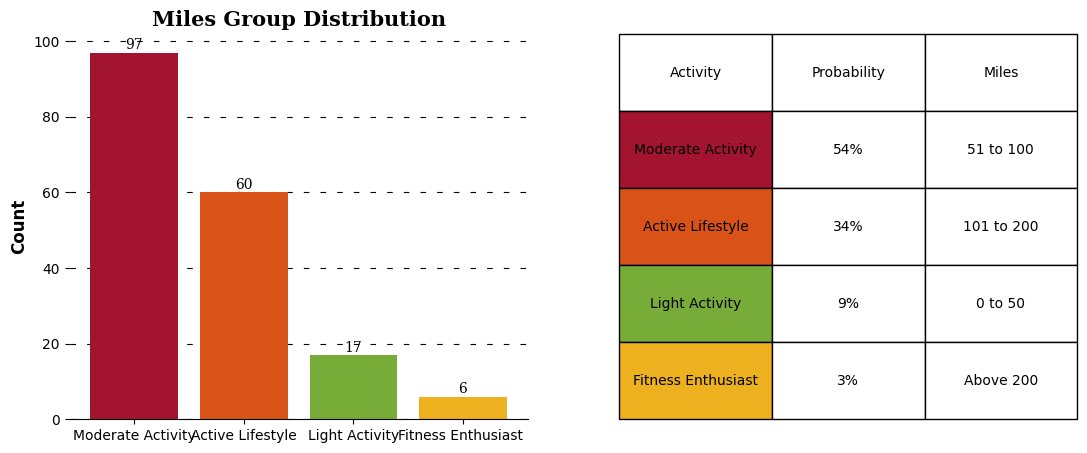

In [ ]:
#setting the plot style

fig = plt.figure(figsize = (13,5))
gs = fig.add_gridspec(1,2)

                                    #creating Miles group bar chart

ax2 = fig.add_subplot(gs[0,0])
temp = df['miles_group'].value_counts()
color_map = ["#A2142F", "#D95319","#77AC39","#EDB120"]
ax2.bar(x=temp.index,height = temp.values,color = color_map,zorder = 2)

#adding the value_counts
for i in temp.index:
    ax2.text(i,temp[i]+2,temp[i],{'font':'serif','size' : 10},ha = 'center',va = 'center')

#adding grid lines
ax2.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)

#adding axis label
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax2.set_title('Miles Group Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                        #creating a table for group info

ax3 = fig.add_subplot(gs[0,1])
miles_info = [['Moderate Activity','54%','51 to 100'],['Active Lifestyle','34%','101 to 200'],['Light Activity','9%','0 to 50'],
            ['Fitness Enthusiast','3%','Above 200']]
color_2d = [["#A2142F",'#FFFFFF','#FFFFFF'],["#D95319",'#FFFFFF','#FFFFFF'],['#77AC39','#FFFFFF','#FFFFFF'],
            ['#EDB120','#FFFFFF','#FFFFFF']]

table = ax3.table(cellText = miles_info, cellColours=color_2d, cellLoc='center',colLabels =['Activity','Probability','Miles'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])

table.set_fontsize(11)

#removing axis
ax3.axis('off')


plt.show()

### 🔍 Insights

- Almost `88%` of the customers plans to use the treadmill for `50 to 200 miles` per week with a median of `94 miles per week`.


- **Outliers**
    
     - As we can see from the box plot, there are `8 outlier's` present in the miles data.

### 🧑🏻👨🏻👴🏻 Product Preferences Across Age

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,5

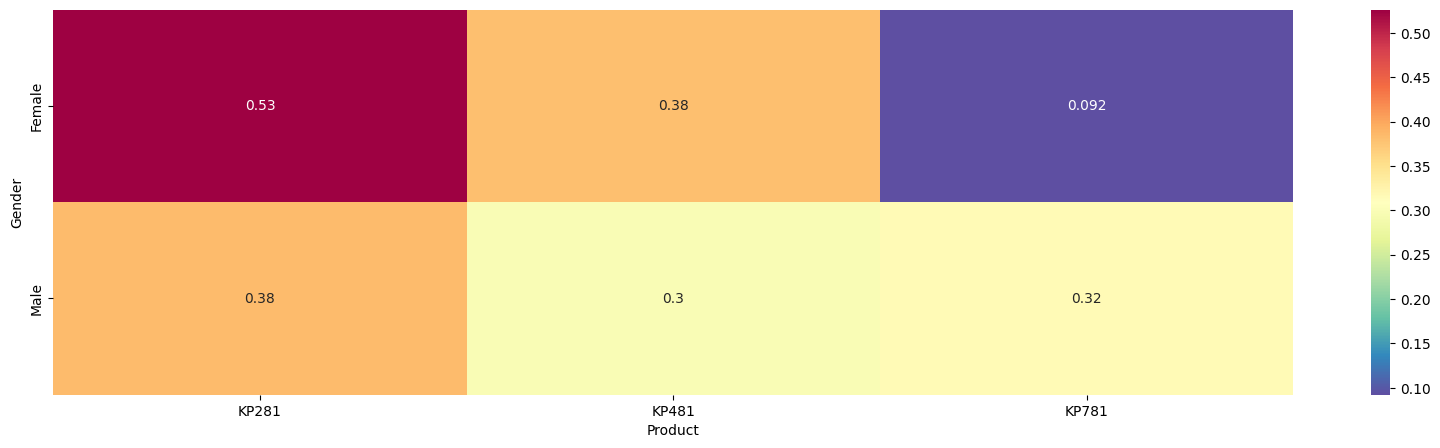

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

### Conditional Probability, P(Product | Gender)
1. Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.

2. Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.

3. Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

4. Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.

6. Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.

7. Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.

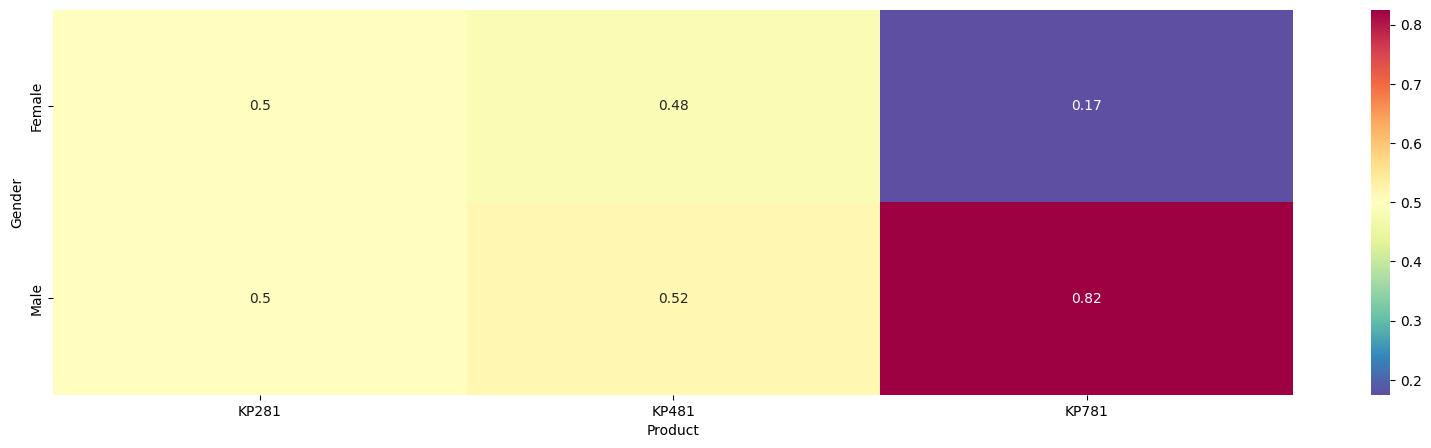

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

### Conditional Probability, P(Gender | Product)
1. Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.

2. Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.

3. Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.

4. Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.

5. Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 0.82.

6. Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17.

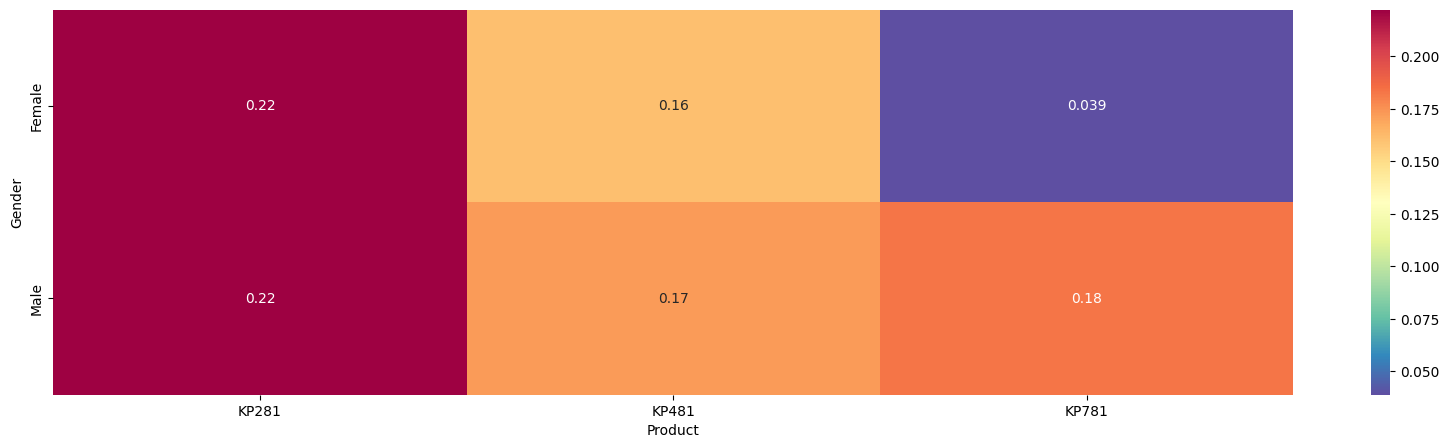

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

### Joint Probability, P(Product Intersection Gender)
1. Probability that customer buys KP281 and gender is Male, P(KP281 Intersection Male) = 0.22.
2. Probability that customer buys KP481 and gender is Male, P(KP481 Intersection Male) = 0.17.
3. Probability that customer buys KP781 and gender is Male, P(KP781 Intersection Male) = 0.18.
4. Probability that customer buys KP281 and gender is Female, P(KP281 Intersection Female) = 0.22.
5. Probability that customer buys KP481 and gender is Female, P(KP481 Intersection Female) = 0.16.
6. Probability that customer buys KP781 and gender is Female, P(KP781 Intersection Female) = 0.039.

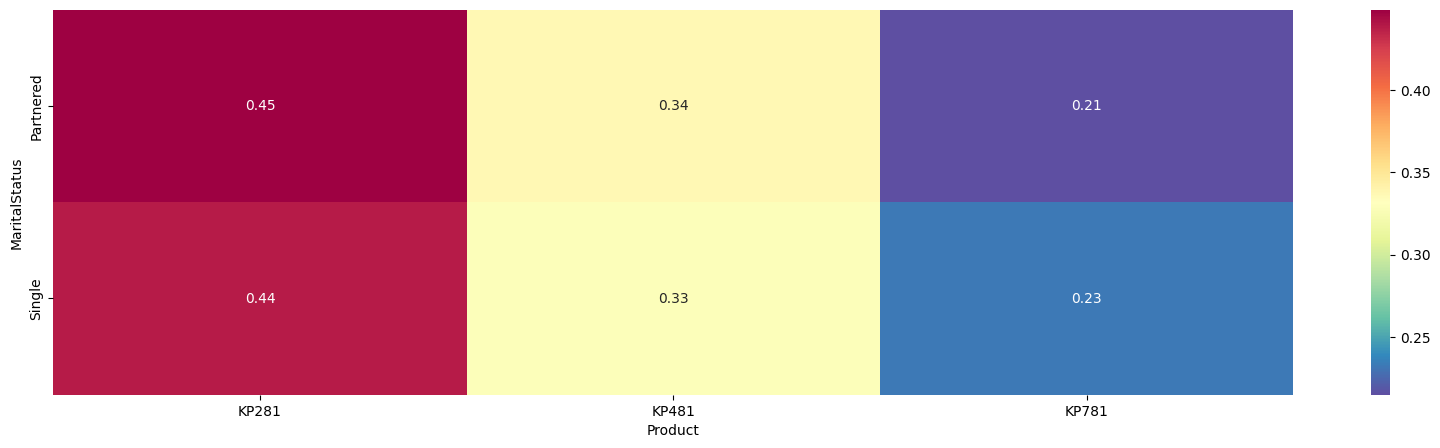

In [ ]:
sns.heatmap(pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

### Conditional Probability, P(Product | MaritalStatus)
1. Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.

2. Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.

3. Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.

4. Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.

5. Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34.

6. Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.

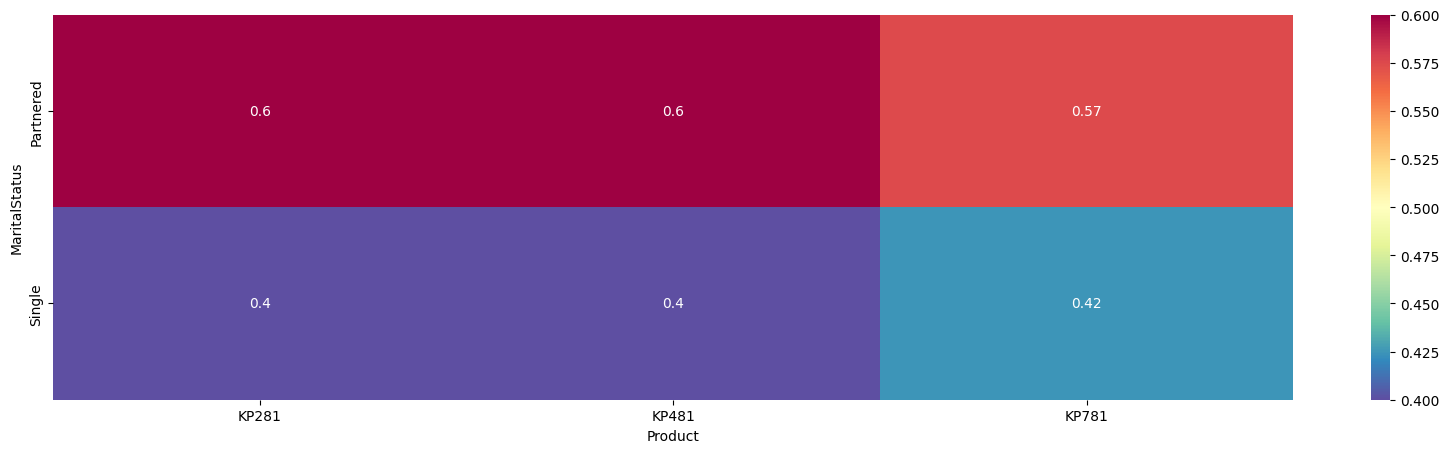

In [ ]:
sns.heatmap(pd.crosstab(df['MaritalStatus'], df['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

### Conditional Probability P(MaritalStatus | Product)
1. Probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 0.40.
2. Probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 0.60.
3. Probability of Marital Status being Single given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 0.4.
4. Probability of Marital Status being Partnered given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 0.6.
5. Probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 0.42.
6. Probability of Marital Status being Partnered given that KP781 is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 0.57

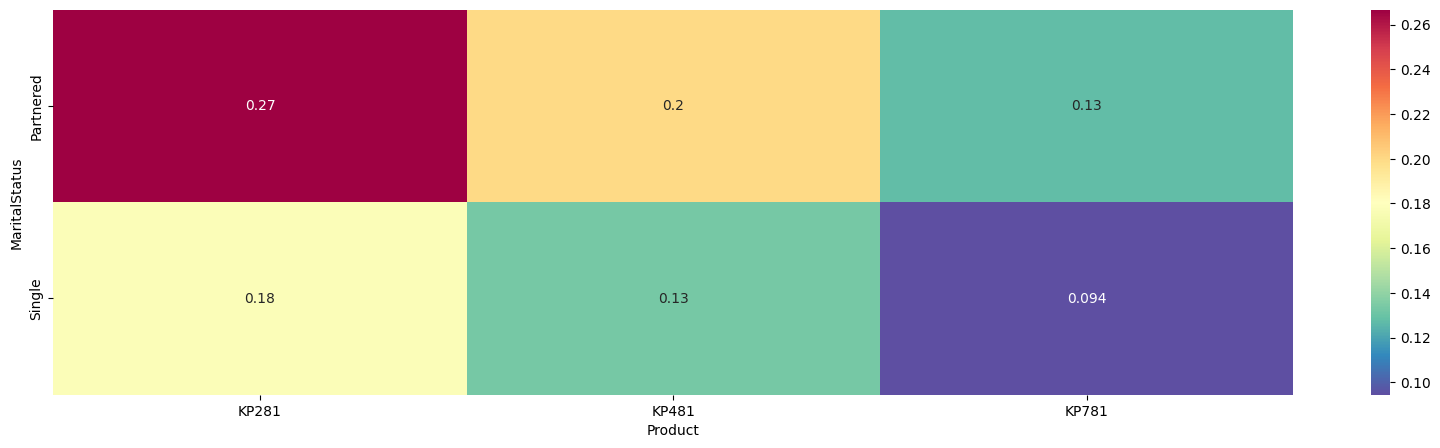

In [ ]:
sns.heatmap(pd.crosstab(df['MaritalStatus'], df['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

### Joint Probability, P(Product Intersection MartialStatus)
1. Probability of customer buying KP281 and their MartialStatus is Single, P(KP281 Intersection Single) = 0.18.
2. Probability of customer buying KP481 and their MartialStatus is Single, P(KP481 Intersection Single) = 0.13.
3. Probability of customer buying KP781 and their MartialStatus is Single, P(KP781 Intersection Single) = 0.094.
4. Probability of customer buying KP281 and their MartialStatus is Partnered, P(KP281 Intersection Partnered) = 0.27.
5. Probability of customer buying KP481 and their MartialStatus is Partnered, P(KP481 Intersection Partnered) = 0.2.
6. Probability of customer buying K7281 and their MartialStatus is Partnered, P(KP781 Intersection Partnered) = 0.13.

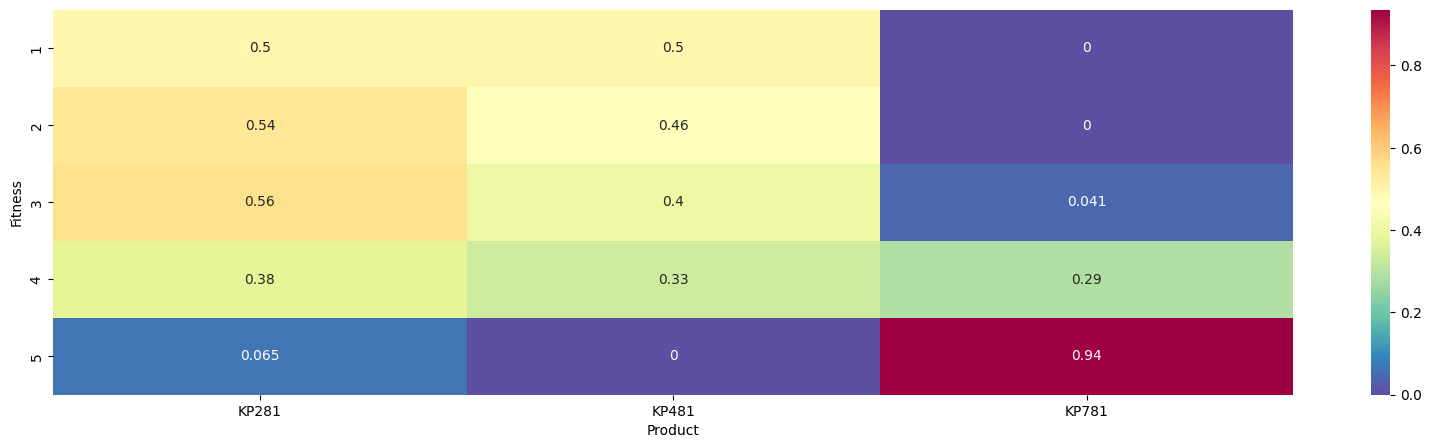

In [ ]:
sns.heatmap(pd.crosstab(df['Fitness'], df['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

### Conditional Probability P(Product | Fitness)
1. Probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 0.06.
2. Probability of customer buying KP481 given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0.0 (impossible event).
3. Probability of customer buying KP781 given fitness rating is 5, P(Product=KP781 | Fitness=5) = 0.94.
4. Probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 0.38.
5. Probability of customer buying KP481 given fitness rating is 4, P(Product=KP481 | Fitness=4) = 0.33.
6. Probability of customer buying KP781 given fitness rating is 4, P(Product=KP781 | Fitness=4) = 0.29.
7. Probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 0.56.
8. Probability of customer buying KP481 given fitness rating is 3, P(Product=KP481 | Fitness=3) = 0.4.
9. Probability of customer buying KP781 given fitness rating is 3, P(Product=KP781 | Fitness=3) = 0.04.
10. Probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 0.54.
11. Probability of customer buying KP481 given fitness rating is 2, P(Product=KP481 | Fitness=2) = 0.46.
12. Probability of customer buying KP781 given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0.0 (impossible event).
13. Probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 0.5.
14. Probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 0.5.
15. Probability of customer buying KP781 given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0.0 (impossible event).

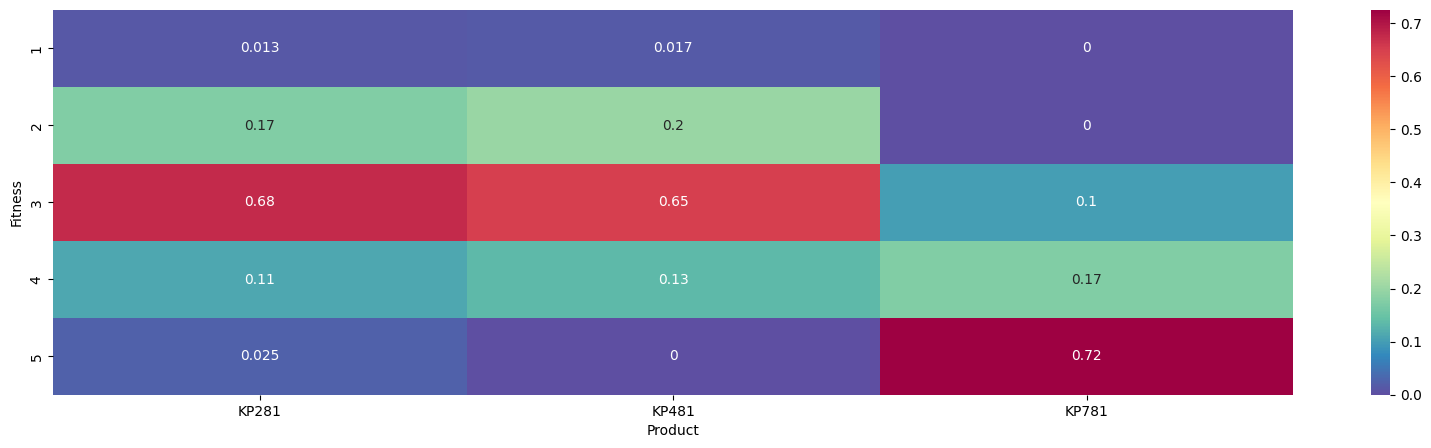

In [ ]:
sns.heatmap(pd.crosstab(df['Fitness'],df['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

### Conditional Probability P(Fitness | Product)
1. Probability of customer fitness rating is 5 given that they purchased KP281, P(Fitness=5 | Product=KP281) = 0.025.
2. Probability of customer fitness rating is 4 given that they purchased KP281, P(Fitness=4 | Product=KP281) = 0.11.
3. Probability of customer fitness rating is 3 given that they purchased KP281, P(Fitness=3 | Product=KP281) = 0.68.
4. Probability of customer fitness rating is 2 given that they purchased KP281, P(Fitness=2 | Product=KP281) = 0.17.
5. Probability of customer fitness rating is 1 given that they purchased KP281, P(Fitness=1 | Product=KP281) = 0.013.
6. Probability of customer fitness rating is 5 given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0.0 (impossible event).
7. Probability of customer fitness rating is 4 given that they purchased KP481, P(Fitness=4 | Product=KP481) = 0.13.
8. Probability of customer fitness rating is 3 given that they purchased KP481, P(Fitness=3 | Product=KP481) = 0.65.
9. Probability of customer fitness rating is 2 given that they purchased KP481, P(Fitness=2 | Product=KP481) = 0.2.
10. Probability of customer fitness rating is 1 given that they purchased KP481, P(Fitness=1 | Product=KP481) = 0.017.
11. Probability of customer fitness rating is 5 given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.72.
12. Probability of customer fitness rating is 4 given that they purchased KP781, P(Fitness=4 | Product=KP781) = 0.17.
13. Probability of customer fitness rating is 3 given that they purchased KP781, P(Fitness=3 | Product=KP781) = 0.1.
14. Probability of customer fitness rating is 2 given that they purchased KP781, P(Fitness=2 | Product=KP781) = 0.0 (impossible event).
14. Probability of customer fitness rating is 1 given that they purchased KP781, P(Fitness=1 | Product=KP781) = 0.0 (impossible event).

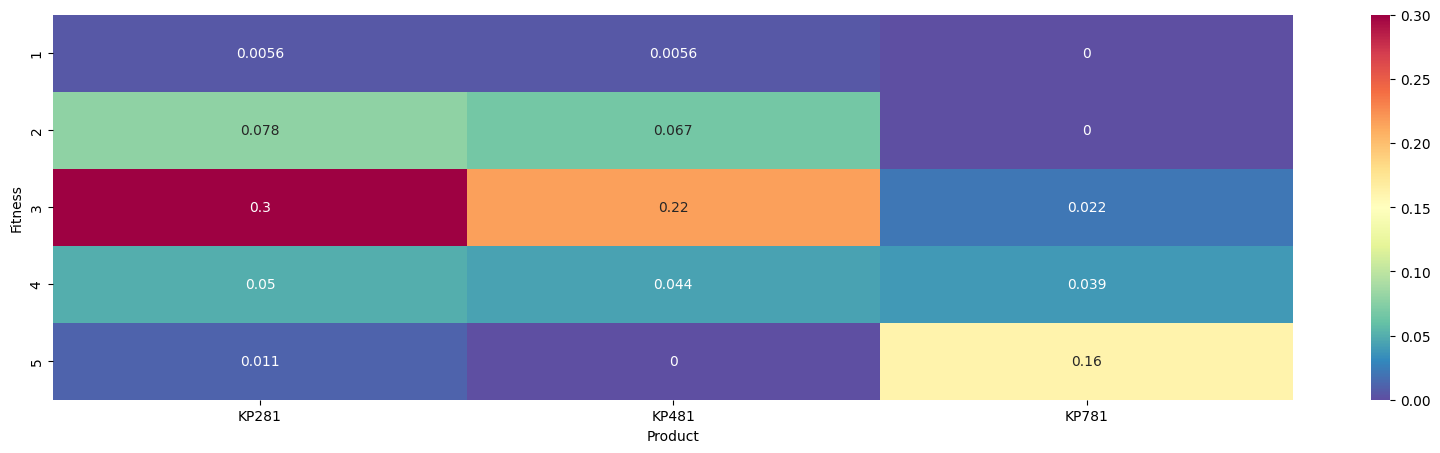

In [ ]:
sns.heatmap(pd.crosstab(df['Fitness'], df['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

### Joint Probability P(Product Intersection Fitness)
1. Probability of buying KP281 and their fitness rating is 5, P(KP281 Intersection Fitness=5) = 0.0011.
2. Probability of buying KP281 and their fitness rating is 4, P(KP281 Intersection Fitness=4) = 0.05.
3. Probability of buying KP281 and their fitness rating is 3, P(KP281 Intersection Fitness=3) = 0.3.
4. Probability of buying KP281 and their fitness rating is 2, P(KP281 Intersection Fitness=2) = 0.078.
5. Probability of buying KP281 and their fitness rating is 1, P(KP281 Intersection Fitness=1) = 0.0056.
6. Probability of buying KP481 and their fitness rating is 5, P(KP481 Intersection Fitness=5) = 0.0 (impossible event).
7. Probability of buying KP481 and their fitness rating is 4, P(KP481 Intersection Fitness=4) = 0.0044.
8. Probability of buying KP481 and their fitness rating is 3, P(KP481 Intersection Fitness=3) = 0.22.
9. Probability of buying KP481 and their fitness rating is 2, P(KP481 Intersection Fitness=2) = 0.067.
10. Probability of buying KP481 and their fitness rating is 1, P(KP481 Intersection Fitness=1) = 0.0056.
11. Probability of buying KP781 and their fitness rating is 5, P(KP781 Intersection Fitness=5) = 0.16.
12. Probability of buying KP781 and their fitness rating is 4, P(KP781 Intersection Fitness=4) = 0.039.
13. Probability of buying KP781 and their fitness rating is 3, P(KP781 Intersection Fitness=3) = 0.022.
14. Probability of buying KP781 and their fitness rating is 2, P(KP781 Intersection Fitness=2) = 0.0 (impossible event).
15. Probability of buying KP781 and their fitness rating is 1, P(KP781 Intersection Fitness=1) = 0.0 (impossible event).

In [ ]:
df['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


### Marginal Probability P(Product)
- Probability of buying KP281 treadmill, P(Product=KP281) = 0.44.
- Probability of buying KP481 treadmill, P(Product=KP481) = 0.33.
- Probability of buying KP781 treadmill, P(Product=KP781) = 0.22.

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.577778
Female,0.422222


### Marginal Probability P(Gender)
- Probability of customer gender is Male, P(Gender=Male) = 0.58.
- Probability of customer gender is Female, P(Gender=Female) = 0.42.


In [ ]:
df['MaritalStatus'].value_counts(normalize=True)

,proportion
MaritalStatus,
Partnered,0.594444
Single,0.405556


### Marginal Probability P(MaritalStatus)
- Probability of customer's MaritalStatus is Partnered, P(MaritalStatus=Partnered) = 0.60.
- Probability of customer's MaritalStatus is Single, P(MaritalStatus=Single) = 0.40.

In [ ]:
df['Fitness'].value_counts(normalize=True)

,proportion
Fitness,
3,0.538889
5,0.172222
2,0.144444
4,0.133333
1,0.011111


### Marginal Probability P(Fitness)
- Probability of customer having fitness rating of 3 is P(Fitness=3) = 0.53.
- Probability of customer having fitness rating of 5 is P(Fitness=5) = 0.17.
- Probability of customer having fitness rating of 2 is P(Fitness=2) = 0.14.
- Probability of customer having fitness rating of 4 is P(Fitness=4) = 0.13.
- Probability of customer having fitness rating of 1 is P(Fitness=1) = 0.01.

In [ ]:
df['Usage'].value_counts(normalize=True)

,proportion
Usage,
3,0.383333
4,0.288889
2,0.183333
5,0.094444
6,0.038889
7,0.011111


### Marginal Probability P(Usage)
- Probability of customer having usage 3 times per week is P(Usage=3) = 0.38.
- Probability of customer having usage 4 times per week is P(Usage=4) = 0.29.
- Probability of customer having usage 2 times per week is P(Usage=2) = 0.18.
- Probability of customer having usage 5 times per week is P(Usage=5) = 0.09.
- Probability of customer having usage 6 times per week is P(Usage=6) = 0.03.
- Probability of customer having usage 7 times per week is P(Usage=7) = 0.01.











<h1 style="color:red">Conclusions<h1>

Business Insights(based on Non-Graphical and Visual Analysis):

 - The top three purchased treadmill models are KP281, KP481, and KP781, in that order.
- There is a higher proportion of male buyers compared to female buyers.
- More customers are in a partnered marital status compared to single.
- The average age of customers is 28, with a range between 18 to 50 years and a median of 26 years.
- The average education level of customers is 15.5 years, with a range between 2 to 21 years and a median of 16 years.
- On average, customers plan to use the treadmill three times per week, with a range between 2 to 7 times per week and a median of three times per week.
- The average self-fitness rating of customers is 3, with a range between 1 to 5 and a median of 3.
- Customers' average annual income is 53.7K dollars, with a range between 29.5K dollars to 104K dollars and a median income of 50.5K dollars.
- The average distance traveled by customers on the treadmill is 103 miles, with a range between 21 to 360 miles and a median of 94 miles.
- There is a moderately strong relationship between education and income.
- The relationship between fitness and distance traveled on the treadmill is strong.
- Similarly, there is a strong relationship between usage frequency and distance traveled on the treadmill.
- The age difference between the 25th and 75th percentile is nine years, indicating a relatively narrow age spread among customers.
- The education years difference between the 25th and 75th percentile is two years, suggesting a moderate spread in education levels among customers.
- Most customers use the treadmill 3-4 times per week, with very few using it 6-7 times per week.
- The majority of customers rate themselves as moderately fit.
- The mean income for KP281 buyers is 46.4K dollars, for KP481 buyers is 48.9K dollars, and for KP781 buyers is 75.4K dollars.
- KP281 and KP481 have the same mean usage of 3, while KP781 has a mean usage of 4.
- The mean fitness rating for KP281 and KP481 buyers is 3, while for KP781 buyers, it is 4.6.
- KP781 is the most preferred treadmill among male customers, while females show the least preference for it.
- Overall, male customers tend to use treadmills more frequently than females.
- The income distribution between both genders is roughly similar.
- Males tend to have a higher fitness level compared to females.
- The distance traveled on the treadmill is roughly the same for both genders, but men tend to cover longer distances, with some going beyond 320 miles.
- Partnered customers tend to have a higher fitness level compared to singles.

## Recommendations
1. Promote KP281 and KP481 treadmills as budget-friendly options, especially targeting customers with annual incomes in the range of 39K - 53K Dollars.
2. Market KP781 treadmill as a premium product with advanced features, targeting professionals and athletes.
3. Enhance the marketing strategy for KP781 by associating it with renowned athletes like Neeraj Chopra, leveraging their achievements for better outreach.
4. Run special marketing campaigns on Women's Day and Mother's Day to encourage more women to adopt an exercise routine, highlighting the benefits of using our treadmills.
5. Conduct research to expand the customer base beyond 50 years of age. Offer basic treadmill models (KP281/KP481) as suitable options for beginners in this age group.
6. Encourage existing customers to upgrade their treadmills to high-end models as their usage increases over time, leading to increased revenue for the business.